In [2]:
pip install geopandas rtree
pip install reverse_geocode
pip install geopy



SyntaxError: invalid syntax (2439366417.py, line 1)

In [1]:
import numpy as np
import pandas as pd
from shapely.geometry import Polygon
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


Plot Literature

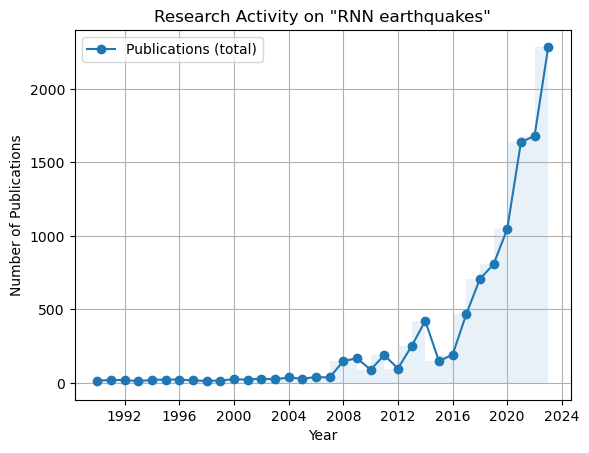

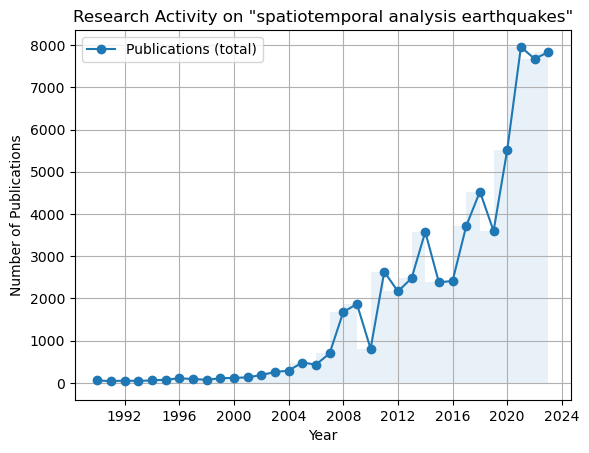

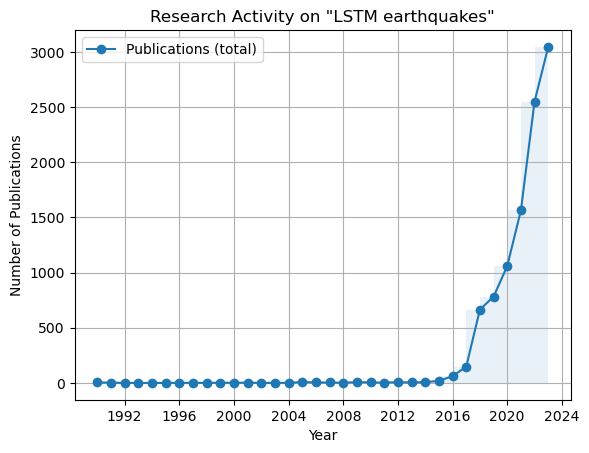

In [5]:
#Plot literature keywords
def plot_research_activity(csv_path, keywords):
    # Read the data into a pandas DataFrame
    data = pd.read_csv(csv_path)

    # Create a line plot of the publications over time
    ax = data.plot(x='Category', y='Publications (total)', kind='line', marker='o', title=f'"{keywords}" Publications Over Time')

    # Filling the area below the line plot
    plt.fill_between(data['Category'], data['Publications (total)'], step="pre", alpha=0.1)

    # Improving the layout
    plt.grid(True)
    plt.xlabel('Year')
    plt.ylabel('Number of Publications')
    plt.title(f'Research Activity on "{keywords}"')

    # Ensuring the x-axis only shows integer year values
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    # Show the plot
    plt.show()

# Paths to our CSV files
csv_paths = ['C:/Users/Harrys/Desktop/Thesis/Literature/timeline/keywords RNN earthquakes.csv', 'C:/Users/Harrys/Desktop/Thesis/Literature/timeline/key words spatiotemporal analysis earthquakes.csv', 'C:/Users/Harrys/Desktop/Thesis/Literature/timeline/keywords LSTM earthquakes.csv']
keywords_list = ['RNN earthquakes', 'spatiotemporal analysis earthquakes', 'LSTM earthquakes']

# Loop through each CSV file and plot the data
for csv_path, keywords in zip(csv_paths, keywords_list):
    plot_research_activity(csv_path, keywords)

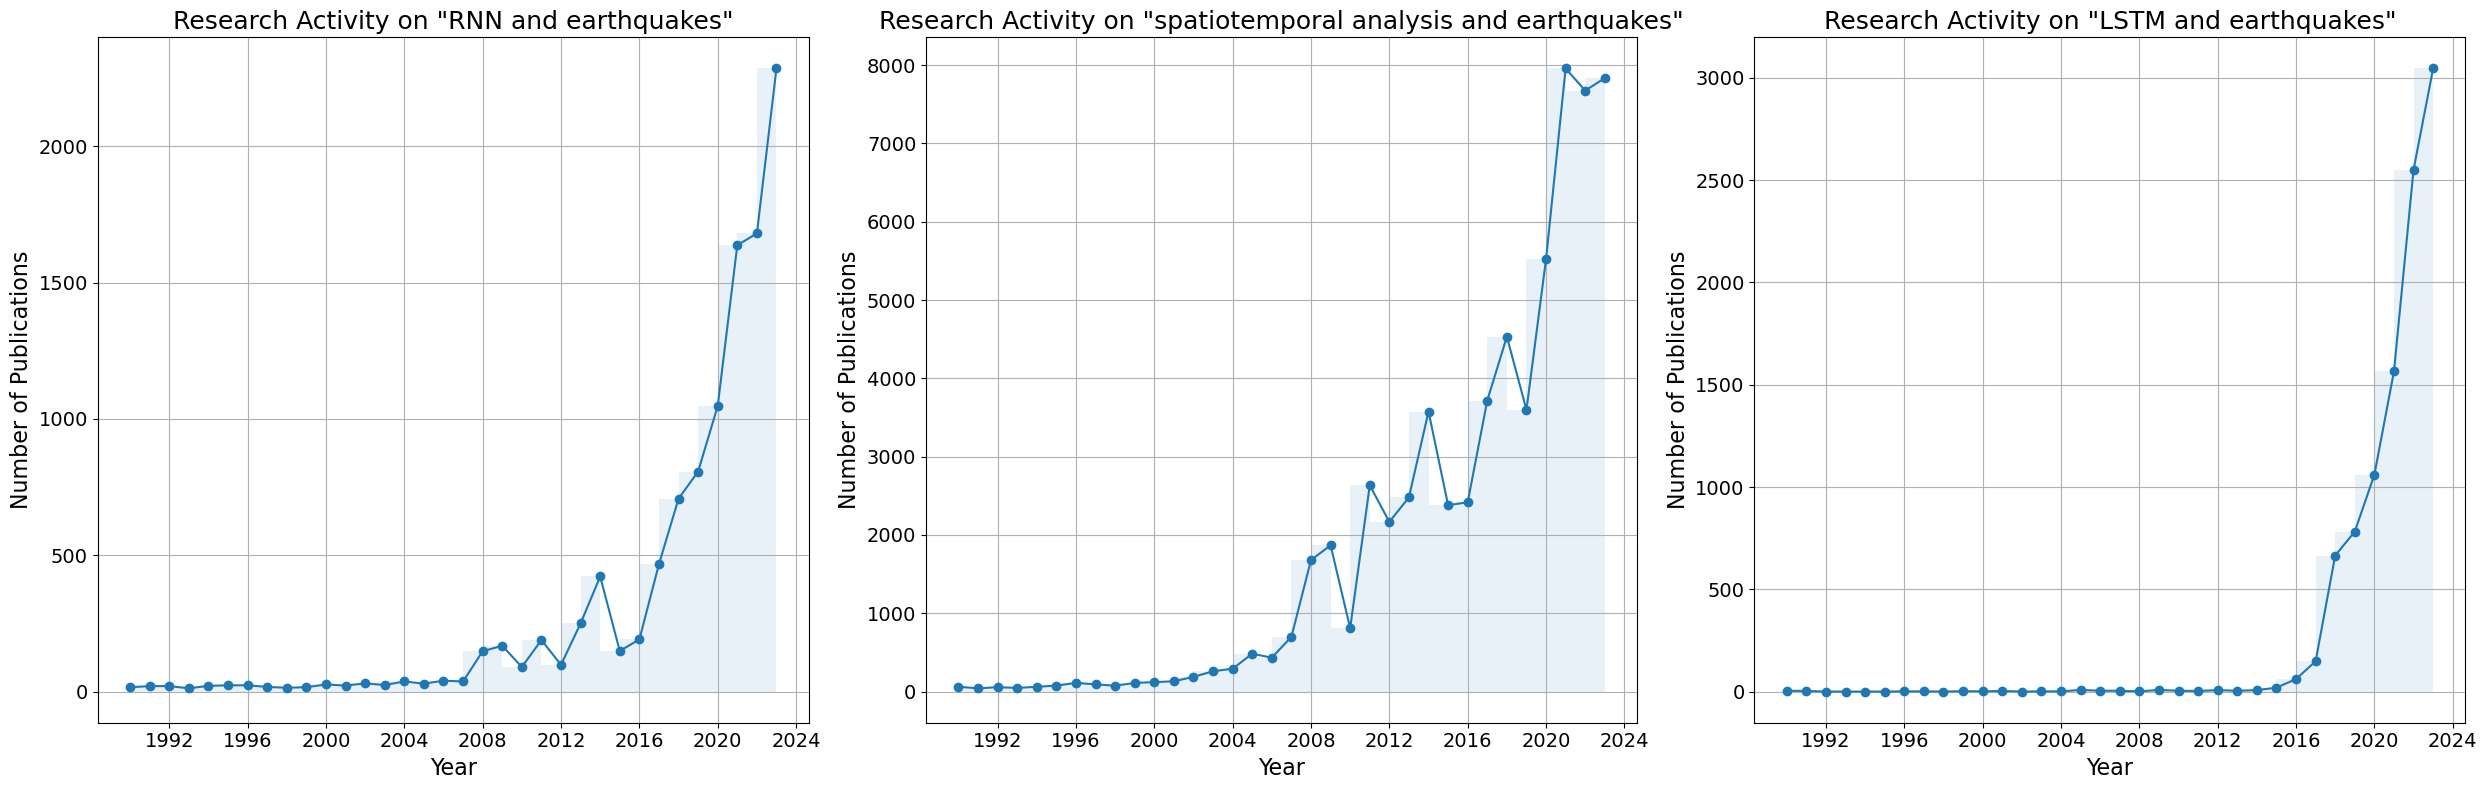

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Function to plot research activity in a given subplot
def plot_research_activity(ax, csv_path, keywords):
    # Read the data into a pandas DataFrame
    data = pd.read_csv(csv_path)

    # Create a line plot of the publications over time
    ax.plot(data['Category'], data['Publications (total)'], marker='o', label=f'"{keywords}"')

    # Filling the area below the line plot
    ax.fill_between(data['Category'], data['Publications (total)'], step="pre", alpha=0.1)

    # Improving the layout
    ax.grid(True)
    ax.set_xlabel('Year', fontsize=16)
    ax.set_ylabel('Number of Publications', fontsize=16)
    ax.set_title(f'Research Activity on "{keywords}"', fontsize=18)

    # Ensuring the x-axis only shows integer year values
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=14)  # Increase tick label size

# Paths to our CSV files
csv_paths = [
    'C:/Users/Harrys/Desktop/Thesis/Literature/timeline/keywords RNN earthquakes.csv',
    'C:/Users/Harrys/Desktop/Thesis/Literature/timeline/key words spatiotemporal analysis earthquakes.csv',
    'C:/Users/Harrys/Desktop/Thesis/Literature/timeline/keywords LSTM earthquakes.csv'
]
keywords_list = ['RNN and earthquakes', 'spatiotemporal analysis and earthquakes', 'LSTM and earthquakes']

# Create a figure with subplots in a single row
fig, axs = plt.subplots(1, len(csv_paths), figsize=(25, 8))  # Increase height for better readability

# Loop through each CSV file and plot the data in corresponding subplot
for ax, csv_path, keywords in zip(axs, csv_paths, keywords_list):
    plot_research_activity(ax, csv_path, keywords)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as a PDF
plt.savefig("Research_Activity.pdf")

# Show the combined plot
plt.show()


In [3]:
#read the dataset
df = pd.read_csv("Earthquakes 1900-01-01 00-00-00 until 2024-01-31 23-59-59.csv")
#print(df.head())
#print(df.columns)

#deleting unnecessary columns
df = df.drop(columns=["id", "type", "status", "locationSource", "magSource", "updated"], inplace=False)
#print(df.head())
#print(df.columns)

Mapping of earthquakes with countries


In [5]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point


# Convert the DataFrame to a GeoDataFrame
gdf_earthquakes = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")

# Load the administrative boundaries GeoJSON
gdf_admin_boundaries = gpd.read_file('C:/Users/Harrys/Desktop/Thesis/states and countries/ne_10m_admin_0_countries.geojson')

# Display the first few rows to inspect the data
print(gdf_admin_boundaries)

# Display the geometry type to ensure it's what we expect (should be polygons)
print(gdf_admin_boundaries.geometry.type.unique())
print("moving on")

          featurecla  scalerank  LABELRANK                    SOVEREIGNT  \
0    Admin-0 country          0          2                     Indonesia   
1    Admin-0 country          0          3                      Malaysia   
2    Admin-0 country          0          2                         Chile   
3    Admin-0 country          0          3                       Bolivia   
4    Admin-0 country          0          2                          Peru   
..               ...        ...        ...                           ...   
253  Admin-0 country          0          4                         China   
254  Admin-0 country          6          5                     Australia   
255  Admin-0 country          6          8  Bajo Nuevo Bank (Petrel Is.)   
256  Admin-0 country          6          5               Serranilla Bank   
257  Admin-0 country          6          6              Scarborough Reef   

    SOV_A3  ADM0_DIF  LEVEL               TYPE TLC  \
0      IDN         0      2  Sove

In [6]:
# Function to find the nearest country for a given point
def find_nearest_country(point, countries_gdf):
    # Initialize minimum distance to a large number
    min_dist = np.inf
    nearest_country = None
    
    # Iterate over all countries
    for _, country in countries_gdf.iterrows():
        # If the earthquake point is within the country's boundary, it's the nearest country
        if country['geometry'].contains(point):
            return country['SOVEREIGNT']
        
        # Calculate the distance from the point to the country's boundary
        dist = point.distance(country['geometry'])
        
        # Update minimum distance and nearest country if current distance is smaller
        if dist < min_dist:
            min_dist = dist
            nearest_country = country['SOVEREIGNT']
    
    return nearest_country

# Apply the function to each earthquake point
gdf_earthquakes['countries'] = gdf_earthquakes['geometry'].apply(lambda x: find_nearest_country(x, gdf_admin_boundaries))

# Drop the geometry column if it's no longer needed
df['countries'] = gdf_earthquakes['countries']

# Now df has a new column 'countries' with the name of the nearest country
print(df.head())


                       time  latitude  longitude    depth  mag magType    nst  \
0  2024-01-31T10:49:36.269Z  -22.8316  -177.1381  185.482  5.8     mww  106.0   
1  2024-01-29T22:27:41.998Z   41.1867    78.7155   10.000  5.7     mww   89.0   
2  2024-01-28T09:38:56.462Z   -8.2366   -71.4097  619.551  6.5     mww  250.0   
3  2024-01-27T05:52:49.802Z   14.1128   -90.5191  107.952  6.1     mww  133.0   
4  2024-01-25T23:01:02.121Z   -1.1559   -13.9734   10.000  5.5     mww   79.0   

    gap   dmin   rms net                          place  horizontalError  \
0  31.0  2.441  0.86  us      264 km SW of Houma, Tonga             9.91   
1  35.0  1.333  0.88  us     122 km WNW of Aykol, China             7.07   
2  32.0  6.519  0.99  us    71 km W of Tarauacá, Brazil             7.86   
3  41.0  0.417  1.13  us  7 km NW of Taxisco, Guatemala             7.20   
4  39.0  6.743  0.56  us      north of Ascension Island             6.22   

   depthError  magError  magNst       countries  
0     

In [7]:
df.to_csv("df3.csv")

In [12]:
print("-------------")
# Count NaN, None, and empty string values in the 'countries' column
na_or_empty = df['countries'].isna() | (df['countries'] == '') | (df['countries'].isnull())
# Print the total count of NaN, None, and empty string values
print("Total NaN, None, or empty string values in 'countries':", na_or_empty.sum())
print(df["countries"].value_counts())
counts = df["countries"].value_counts()
counts.to_csv("countries.csv")

-------------
Total NaN, None, or empty string values in 'countries': 0
Indonesia                   4293
Japan                       3064
United States of America    2849
Russia                      2301
Papua New Guinea            2217
                            ... 
Scarborough Reef               1
Malta                          1
Namibia                        1
Guyana                         1
Slovakia                       1
Name: countries, Length: 152, dtype: int64


## START OF THE CODE.
## Running the code from here, so we don't wait every time for the mapping of countries 


In [4]:
import numpy as np
import pandas as pd
from shapely.geometry import Polygon
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

#starting by reading df3 so i dont have to wait 30 min every time (cause of the above code)
#read the dataset
df = pd.read_csv("earthquakes 1900-2024 with countries.csv")

## Map earthquakes with tectonic plates


In [195]:
import geopandas as gpd

# Load the GeoJSON files
gdf_boundaries = gpd.read_file('C:/Users/Harrys/Desktop/Thesis/plates mapping/PB2002_boundaries.json')
gdf_plates = gpd.read_file('C:/Users/Harrys/Desktop/Thesis/plates mapping/PB2002_plates.json')

# Convert the earthquake DataFrame to a GeoDataFrame
gdf_earthquakes = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# WGS84 (EPSG:4326) -> latitudes range from -90 to 90 degrees and longitudes from -180 to 180 degrees
#Set Coordinate Reference Systems (CRS)
gdf_earthquakes.crs = gdf_boundaries.crs = gdf_plates.crs = "EPSG:4326"

# Perform spatial join to associate earthquakes with tectonic plates
df = gpd.sjoin(gdf_earthquakes, gdf_plates, how="left", op='intersects')


# Display the first few rows of the modified dataframe to confirm the changes
df.head()
df.to_csv("df.csv")


c:\Anacoda\Lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


## Visualizing the Data 


Indonesia                           4293
Japan                               3064
United States of America            2849
Russia                              2301
Papua New Guinea                    2217
Chile                               1762
New Zealand                         1512
Philippines                         1429
Vanuatu                             1350
Tonga                               1310
United Kingdom                      1306
Fiji                                1132
Solomon Islands                     1065
France                               925
Mexico                               881
China                                821
Antarctica                           749
Peru                                 576
Taiwan                               457
Greece                               439
India                                429
Iran                                 370
Samoa                                360
Australia                            350
Brazil          

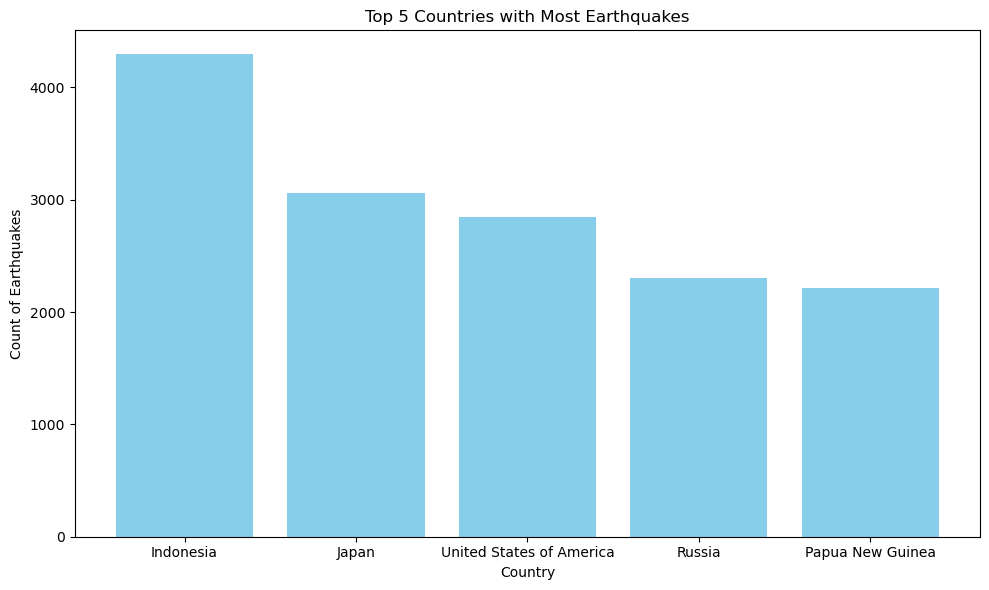

In [196]:
#Process of finding the most proned to earthquake countries in the dataset

print(df["countries"].value_counts())
country_counts = df['countries'].value_counts()

# Convert the Series into a DataFrame
country_counts_df = country_counts.reset_index()
# Rename the columns to "Country" and "Count"
country_counts_df.columns = ['Country', 'Count']
# Display the resulting DataFrame
country_counts_df  
# Export DataFrame to CSV
country_counts_df.to_csv('country_counts.csv', index=False)


print("-------------")
# Count NaN, None, and empty string values in the 'countries' column
na_or_empty = df['countries'].isna() | (df['countries'] == '') | (df['countries'].isnull())
# Print the total count of NaN, None, and empty string values
print("Total NaN, None, or empty string values in 'countries':", na_or_empty.sum())
df.to_csv("final-df.csv")

# Plotting the number of earthquakes by country
import matplotlib.pyplot as plt

# Selecting the top 5 countries with the most earthquakes
top_5_countries = country_counts_df.head(5)

# Plotting
plt.figure(figsize=(10, 6))  
plt.bar(top_5_countries['Country'], top_5_countries['Count'], color='skyblue')  #
plt.xlabel('Country')  
plt.ylabel('Count of Earthquakes') 
plt.title('Top 5 Countries with Most Earthquakes')  
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()



Number of earthquakes by tectonic plate

Okhotsk           3401
North America     3266
Sunda             3090
Pacific           2985
Eurasia           2737
South America     2269
Australia         1989
New Hebrides      1424
Philippine Sea    1399
Kermadec          1291
Antarctica        1190
Tonga             1104
South Bismarck    1077
Africa             658
Sandwich           590
Caribbean          589
Nazca              550
Okinawa            538
Birds Head         519
Banda Sea          511
North Bismarck     507
Burma              444
Altiplano          432
Mariana            407
India              386
Timor              363
Molucca Sea        362
Somalia            351
Amur               318
Aegean Sea         302
Woodlark           291
North Andes        256
Niuafo'ou          234
Panama             217
Maoke              207
Juan de Fuca       197
Anatolia           181
Cocos              131
Yangtze            127
Solomon Sea        114
Arabia             105
Scotia              78
Rivera              76
Conway Reef

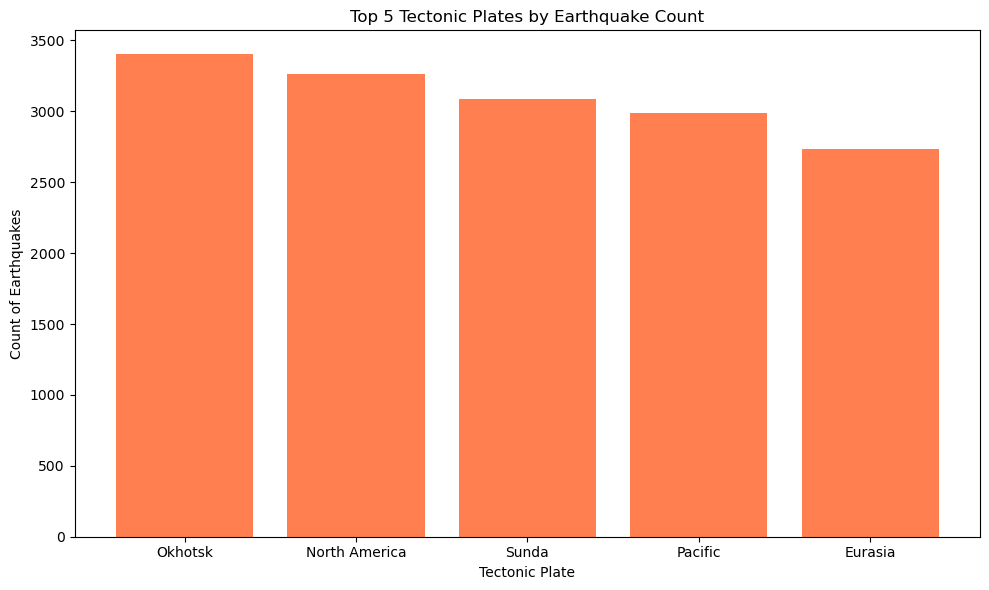

In [197]:
print(df["PlateName"].value_counts())
print(df["PlateName"].value_counts().mean())

import matplotlib.pyplot as plt

# Getting the value counts for "PlateName"
plate_counts = df["PlateName"].value_counts()

# Convert the Series into a DataFrame
plate_counts_df = plate_counts.reset_index()
# Rename the columns to "Plate" and "Count"
plate_counts_df.columns = ['Plate', 'Count']

# Selecting the top 5 plates with the most earthquakes
top_5_plates = plate_counts_df.head(5)

# Plotting
plt.figure(figsize=(10, 6))  
plt.bar(top_5_plates['Plate'], top_5_plates['Count'], color='coral')  
plt.xlabel('Tectonic Plate')  
plt.ylabel('Count of Earthquakes')  
plt.title('Top 5 Tectonic Plates by Earthquake Count') 
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()


C:\Users\Harrys\AppData\Local\Temp\ipykernel_23756\698832713.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


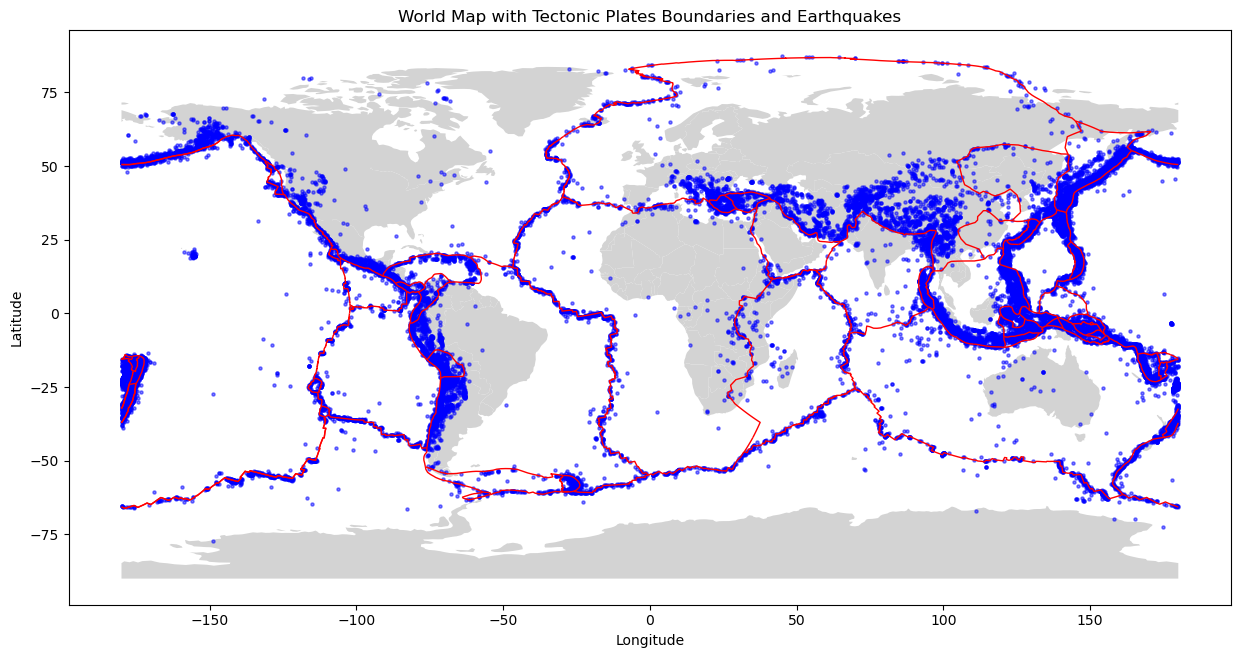

In [198]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the tectonic plates boundaries GeoJSON
gdf_plates_boundaries = gpd.read_file('C:/Users/Harrys/Desktop/Thesis/plates mapping/PB2002_boundaries.json')

# Read earthquakes data
df_earthquakes = df.copy()

# Convert the earthquake DataFrame to a GeoDataFrame
gdf_earthquakes = gpd.GeoDataFrame(df_earthquakes, geometry=gpd.points_from_xy(df_earthquakes.longitude, df_earthquakes.latitude), crs="EPSG:4326")

# Load a simple world map as the base
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Start plotting
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the world map
world.plot(ax=ax, color='lightgrey')

# Plot the tectonic plates boundaries
gdf_plates_boundaries.plot(ax=ax, color='red', linewidth=1)

# Plot the earthquakes
gdf_earthquakes.plot(ax=ax, color='blue', markersize=5, alpha=0.5)

# Set the title and axes labels
ax.set_title('World Map with Tectonic Plates Boundaries and Earthquakes')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


## Creating our target variable which is a counter for the days until the next significant earthquake in each country


In [199]:
import pandas as pd
import numpy as np

print(df["time"])
print(df.columns)

0        2024-01-31T10:49:36.269Z
1        2024-01-29T22:27:41.998Z
2        2024-01-28T09:38:56.462Z
3        2024-01-27T05:52:49.802Z
4        2024-01-25T23:01:02.121Z
5        2024-01-25T12:24:13.958Z
6        2024-01-23T14:33:44.953Z
7        2024-01-22T23:19:26.542Z
8        2024-01-22T19:36:47.834Z
9        2024-01-22T18:14:16.160Z
10       2024-01-22T18:09:04.480Z
11       2024-01-20T22:09:39.708Z
12       2024-01-20T21:31:05.092Z
13       2024-01-20T15:48:40.118Z
14       2024-01-19T11:26:03.175Z
15       2024-01-19T04:57:15.584Z
16       2024-01-18T22:12:22.000Z
17       2024-01-18T12:46:14.335Z
18       2024-01-18T04:50:01.128Z
19       2024-01-17T12:32:01.352Z
20       2024-01-12T07:46:21.171Z
21       2024-01-11T09:20:26.809Z
22       2024-01-09T08:59:10.251Z
23       2024-01-09T07:53:20.125Z
24       2024-01-08T20:48:43.797Z
25       2024-01-07T20:00:07.311Z
26       2024-01-07T18:06:11.273Z
27       2024-01-06T12:33:02.574Z
28       2024-01-06T11:46:31.666Z
29       2024-

In [200]:
df['time'] = pd.to_datetime(df['time'], utc=True)

# Create a copy of the relevant columns to calculate the counter without losing the original order
df_countries = df[['time', 'countries']].copy()

# Sort by countries and time to prepare for the 'counter' calculation
df_countries.sort_values(['countries', 'time'], inplace=True)

# Calculate the days until the next earthquake within each country
# shift(): for each row, the 'next_earthquake' column will hold the date of the next earthquake event in that country.
df_countries['next_earthquake'] = df_countries.groupby('countries')['time'].shift(-1)
df_countries['counter'] = (pd.to_datetime(df_countries['next_earthquake']) - df_countries['time']).dt.days

# Merge the 'counter' column back into the original dataframe using 'time' and 'countries' as keys
df = df.merge(df_countries[['time', 'countries', 'counter']], on=['time', 'countries'], how='left')

# Drop unwanted columns
df = df.drop(columns=["Unnamed: 0", "magType", "gap", "dmin", "rms", "nst", "net", "place", "horizontalError", "depthError", "magError", "magNst", "geometry", "index_right", "LAYER", "Code"])



In [5]:
## Adding time features
df['time'] = pd.to_datetime(df['time'])

# Remove microseconds by flooring to the nearest second
df['time'] = df['time'].dt.floor('S')

# Remove UTC offset by converting to naive datetime object
df['time'] = df['time'].dt.tz_localize(None)

# Check the result
print(df['time'].head())
print(df.head())
df.to_csv("df_with_counters.csv")

# Convert 'time' to datetime if it's not already
df['time'] = pd.to_datetime(df['time'])

# Extract time-based features
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['day_of_week'] = df['time'].dt.dayofweek

# Optional: cyclical encoding for cyclical features like hour and day_of_week
df['hour_sin'] = np.sin(df['hour'] * (2 * np.pi / 24))
df['hour_cos'] = np.cos(df['hour'] * (2 * np.pi / 24))
df['day_of_week_sin'] = np.sin(df['day_of_week'] * (2 * np.pi / 7))
df['day_of_week_cos'] = np.cos(df['day_of_week'] * (2 * np.pi / 7))
df['month_sin'] = np.sin((df['month'] - 1) * (2 * np.pi / 12))  # -1 to adjust month index from 1-12 to 0-11
df['month_cos'] = np.cos((df['month'] - 1) * (2 * np.pi / 12))

# Drop the original 'time' column if it's no longer needed
df.drop('time', axis=1, inplace=True)

# df is now ready with features suitable for an LSTM model
print(df.head())

0   2024-01-31 10:49:36
1   2024-01-29 22:27:41
2   2024-01-28 09:38:56
3   2024-01-27 05:52:49
4   2024-01-25 23:01:02
Name: time, dtype: datetime64[ns]
   Unnamed: 0                time  latitude  longitude    depth  mag magType  \
0           0 2024-01-31 10:49:36  -22.8316  -177.1381  185.482  5.8     mww   
1           1 2024-01-29 22:27:41   41.1867    78.7155   10.000  5.7     mww   
2           2 2024-01-28 09:38:56   -8.2366   -71.4097  619.551  6.5     mww   
3           3 2024-01-27 05:52:49   14.1128   -90.5191  107.952  6.1     mww   
4           4 2024-01-25 23:01:02   -1.1559   -13.9734   10.000  5.5     mww   

     nst   gap   dmin   rms net                          place  \
0  106.0  31.0  2.441  0.86  us      264 km SW of Houma, Tonga   
1   89.0  35.0  1.333  0.88  us     122 km WNW of Aykol, China   
2  250.0  32.0  6.519  0.99  us    71 km W of Tarauacá, Brazil   
3  133.0  41.0  0.417  1.13  us  7 km NW of Taxisco, Guatemala   
4   79.0  39.0  6.743  0.56  us    

In [202]:
## Adding features

# 'country_event_id' column is added
df['country_event_id'] = df.groupby('countries').cumcount()

# Calculate the mean mag up to the current point in time for each country
df['mean mag'] = df.groupby('countries').cumsum()['mag'] / (df['country_event_id'] + 1)

# Calculate the Magnitude Difference compared to the previous event within the same country
df['prev_mag'] = df.groupby('countries')['mag'].shift(-1)
df['Magnitude Difference'] = df['mag'] - df['prev_mag']
# Handle NaN values that result from the shift operation for the first occurrence in each group
df['Magnitude Difference'] = df['Magnitude Difference'].fillna(0)

# Reverse the DataFrame to count earthquakes from oldest to newest for 'number of earthquakes'
df_reversed = df.iloc[::-1]
df_reversed['number of earthquakes'] = df_reversed.groupby('countries').cumcount() + 1

# Now reverse the DataFrame back to its original order
df['number of earthquakes'] = df_reversed['number of earthquakes'].iloc[::-1]

# Drop the intermediate 'prev_mag' column
df.drop('prev_mag', axis=1, inplace=True, errors='ignore')
df.drop('country_event_id', axis=1, inplace=True, errors='ignore')
# Display the DataFrame with the new columns
print(df[['countries', 'mean mag','number of earthquakes' , 'Magnitude Difference']])
df.to_csv("df_new_variables.csv")


C:\Users\Harrys\AppData\Local\Temp\ipykernel_23756\4239026516.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df['mean mag'] = df.groupby('countries').cumsum()['mag'] / (df['country_event_id'] + 1)
C:\Users\Harrys\AppData\Local\Temp\ipykernel_23756\4239026516.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reversed['number of earthquakes'] = df_reversed.groupby('countries').cumcount() + 1


                              countries  mean mag  number of earthquakes  \
0                                 Tonga  5.800000                   1310   
1                                 China  5.700000                    821   
2                                Brazil  6.500000                    335   
3                             Guatemala  6.100000                    217   
4                        United Kingdom  5.500000                   1306   
5                             Indonesia  5.600000                   4293   
6                               Vanuatu  6.300000                   1350   
7                                 China  5.650000                    820   
8                                 China  5.600000                    819   
9                                 China  5.650000                    818   
10                                China  5.920000                    817   
11                               France  6.200000                    925   
12          

In [203]:
## Transforming Countries and Tectonic Plates to categorical
## Transforming integers to floats

print(df.dtypes)
print("####")

list_to_categorical = ["countries", "PlateName"]
df[list_to_categorical] = df[list_to_categorical].astype('category')

# List of columns to convert from int64 to float64
int_columns = df.select_dtypes(include=['int64']).columns

# Convert each column in the list to float64
df[int_columns] = df[int_columns].astype('float64')

# Check the data types to confirm the conversion
print(df.dtypes)

print(df.dtypes)
print("####")

latitude                 float64
longitude                float64
depth                    float64
mag                      float64
countries                 object
PlateName                 object
counter                  float64
year                       int64
month                      int64
day                        int64
hour                       int64
day_of_week                int64
hour_sin                 float64
hour_cos                 float64
day_of_week_sin          float64
day_of_week_cos          float64
month_sin                float64
month_cos                float64
mean mag                 float64
Magnitude Difference     float64
number of earthquakes      int64
dtype: object
####
latitude                  float64
longitude                 float64
depth                     float64
mag                       float64
countries                category
PlateName                category
counter                   float64
year                      float64
month           

## Deleting the year 2024 as it has only 2 months and its not usefull

In [6]:
df = df[df['year'] != 2024.0]
